In [52]:
import sqlite3
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

### Part 1: Retrieving the data

# Split link into 3 parts in order to change numbers in the GET requests later
linkPart1 = 'https://www.transfermarkt.us/premier-league/einnahmenausgaben/wettbewerb/GB1/plus/0?ids=a&sa=&saison_id='
linkPart2 = '&saison_id_bis='
linkPart3 = '&nat=&pos=&altersklasse=&w_s=&leihe=&intern=0'

# DataFrame where all of the data will be stored
df = pd.DataFrame([], columns = ["Spending_Rank", "Season", "Club", "Expenditure", "Arrivals", "Income", "Departures", "Balance"])

# For loop collecting the financial data
for i in range(1978, 2019):
    link = linkPart1 + str(i) + linkPart2 + str(i) + linkPart3
    
    # Get request accessing the sites which have the data
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}
    r = requests.get(link, headers=headers)
    
    # Grabbing the correct table from the specific website and parsing it into a readable format / table
    root = BeautifulSoup(r.content)
    table = root.find_all("table")[3].prettify()
    data = (pd.read_html(table))[0]
     
    # Adding a column for the current season
    data["Season"] = i
    
    # Fixing the columns to all have the correct data 
    data.columns = ["Spending_Rank", "drop", "Club", "Expenditure", "Arrivals", "Income", "Departures", "Balance", "drop2", "Season"]
    data = data.drop(columns=['drop', 'drop2'])
    data = data[["Spending_Rank", "Season", "Club", "Expenditure", "Arrivals", "Income", "Departures", "Balance"]]
    temp = pd.DataFrame(data)
    
    # Adding the new table for the specific season to the grand table
    df = pd.concat([df, temp])
    
print(df)

   Spending_Rank Season               Club Expenditure Arrivals   Income  \
0              1   1978  Manchester United      $1.12m        8    $428k   
1              2   1978         Chelsea FC       $776k        9    $352k   
2              3   1978         Arsenal FC       $684k        6    $114k   
3              4   1978  Tottenham Hotspur       $583k        8        -   
4              5   1978       Liverpool FC       $561k        4    $285k   
..           ...    ...                ...         ...      ...      ...   
15            16   2018  Huddersfield Town     $57.80m       17  $14.06m   
16            17   2018         Burnley FC     $37.62m       10   $9.12m   
17            18   2018         Watford FC     $34.31m       34  $59.10m   
18            19   2018     Crystal Palace     $13.51m       14    $399k   
19            20   2018  Tottenham Hotspur           -        5   $6.10m   

   Departures        Balance  
0           4       -608 K $  
1           7       -372 

In [87]:
import sqlite3
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

df2 = pd.DataFrame([], columns = ["Season", "Team", "Pos", "Pld", "W", "D", "L", "GF", "GA", "GD", "Pts"])

# The first part of the link where the league tables will be collected from
partLink = 'https://en.wikipedia.org/wiki/'

# Looping through all of the years to get each table
for i in range(1978, 2019):
    
    # Adding the year of the league table we are trying to get to the link
    link = partLink + str(i) + '-' + str(i + 1)[2:]

    # The league went through a name change / restructuring, hence the different link
    if (i < 1992):
        link = link + "_Football_League"
    else:
        link = link + "_Premier_League"

    # Get request accessing the sites which have the data
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}
    r = requests.get(link, headers=headers)

    # Grabbing the correct table from the specific website and parsing it into a readable format / table
    root = BeautifulSoup(r.content)
    
    # Going through getting the correct table from the website
    
    # In 1992, the league went through a change, so the pages are different
    if (i < 1991):
        
        # Here, the tables are found at different points on the web page
        if i == 1987:
            table = root.find_all("table")[3].prettify() 
        else:
            table = root.find_all("table")[2].prettify() 
            
        data = (pd.read_html(table))[0]
        
        # Here, we are simplifying the different columns into win, loss, draw, goals for, goals against
        data['W'] = data['HW'] + data['AW']
        data['D'] = data['HD'] + data['AD']
        data['L'] = data['HL'] + data['AL']
        data['GF'] = data['HGF'] + data['AGF']
        data['GA'] = data['HGA'] + data['AGA']
        
        data = data.drop(columns=['HW', 'HD', 'HL', 'HGF', 'HGA', 'AW', 'AD', 'AL', 'AGF', 'AGA', data.columns[len(data.columns) - 6]])
        
        # Two of the years, the table had different columnn names in random spots
        if (i == 1989 or i == 1990):
            data.columns = ['Pos', 'Team', 'Pld', 'GD', 'Pts', 'W', 'D', 'L', 'GF',
       'GA']
        
    else:
        # Here, the tables are found at different points on the page
        if (i == 2016 or i == 2012 or i == 2005 or (i > 1997 and i < 2002)):
            table = root.find_all("table")[5].prettify()
        elif (i == 2003):
            table = root.find_all("table")[7].prettify()
        else:
            table = root.find_all("table")[4].prettify() 
            
        data = (pd.read_html(table))[0]
        
        # Again, simplying the table in to more useful columns
        if (i == 1991):
            data['W'] = data['HW'] + data['AW']
            data['D'] = data['HD'] + data['AD']
            data['L'] = data['HL'] + data['AL']
            data['GF'] = data['HGF'] + data['AGF']
            data['GA'] = data['HGA'] + data['AGA']
        
            data = data.drop(columns=['HW', 'HD', 'HL', 'HGF', 'HGA', 'AW', 'AD', 'AL', 'AGF', 'AGA', data.columns[len(data.columns) - 6]])
        
        else:
            data = data.drop(data.columns[len(data.columns) - 1], axis = 1)
    
    # Adding a column for the current season
    data["Season"] = i

    # Rearranging the columns to be more useful
    data = data[["Season", "Team", "Pos", "Pld", "W", "D", "L", "GF", "GA", "GD", "Pts"]]
        
    df2 = pd.concat([df2, data])

print(df2)

   Season                    Team Pos Pld   W   D   L  GF  GA   GD Pts
0    1978               Liverpool   1  42  30   8   4  85  16  +69  68
1    1978       Nottingham Forest   2  42  21  18   3  61  26  +35  60
2    1978    West Bromwich Albion   3  42  24  11   7  72  35  +37  59
3    1978                 Everton   4  42  17  17   8  52  40  +12  51
4    1978            Leeds United   5  42  18  14  10  70  52  +18  50
..    ...                     ...  ..  ..  ..  ..  ..  ..  ..  ...  ..
15   2018             Southampton  16  38   9  12  17  45  65  −20  39
16   2018  Brighton & Hove Albion  17  38   9   9  20  35  60  −25  36
17   2018       Cardiff City  (R)  18  38  10   4  24  34  69  −35  34
18   2018             Fulham  (R)  19  38   7   5  26  34  81  −47  26
19   2018  Huddersfield Town  (R)  20  38   3   7  28  22  76  −54  16

[857 rows x 11 columns]


In [107]:
### Part 2: Combining Data into one table

# Adding the columns we want from df DataFrame to the second dataframe
df2["Expenditure"] = "0"
df2["Arrivals"] = "0"
df2["Income"] = "0"
df2["Departures"] = "0"
df2["Balance"] = "0"

# The indices were wrong initiall, so we change them to go from 0 to 1
df2.index = range(len(df2))
df.index = range(len(df))

# Some of the names of the team had stray characters. We are removing those stray characters and spaces
for i, j in df2.iterrows():
    
    # R is relegated
    if (type(j.Team) != float and "(R)" in j.Team):
        df2.at[i, "Team"] = j.Team.replace("(R)", "").strip()
    
    # C is Champion
    if (type(j.Team) != float and "(C)" in j.Team):
        df2.at[i, "Team"] = j.Team.replace("(C)", "").strip()

# Here we copy this table in to a new DataFrame, so that we do not damage the old information with new operations
df3 = pd.DataFrame(df2)

# Here, We are now going ahead and finally combining the finance aspect of the data, with the league standing information
for i, j in df3.iterrows():
    # Copy down the current season
    currYear = df[df["Season"] == j.Season]

    # Going through each team for the given season
    for index, currTeam in currYear.iterrows():
        
        # Making sure the team is not a Nan and also matching the two different tables into one
        if (type(df3.iloc[i]["Team"]) != float and df3.iloc[i]["Team"] in currTeam["Club"]):
            df3.at[i, "Expenditure"] = currTeam["Expenditure"]
            df3.at[i, "Arrivals"] = currTeam["Arrivals"]
            df3.at[i, "Income"] = currTeam["Income"]
            df3.at[i, "Departures"] = currTeam["Departures"]
            df3.at[i, "Balance"] = currTeam["Balance"]
    
df3

,Season,Team,Pos,Pld,W,D,L,GF,GA,GD,Pts,Expenditure,Arrivals,Income,Departures,Balance
0,1978,Liverpool,1,42,30,8,4,85,16,+69,68,$561k,4,$285k,5,-243 K $
1,1978,Nottingham Forest,2,42,21,18,3,61,26,+35,60,0,0,0,0,0
2,1978,West Bromwich Albion,3,42,24,11,7,72,35,+37,59,0,0,0,0,0
3,1978,Everton,4,42,17,17,8,52,40,+12,51,$114k,6,$336k,8,195 K $
4,1978,Leeds United,5,42,18,14,10,70,52,+18,50,0,0,0,0,0
5,1978,Ipswich Town,6,42,20,9,13,63,49,+14,49,0,0,0,0,0
6,1978,Arsenal,7,42,17,14,11,61,48,+13,48,$684k,6,$114k,3,-500 K $
7,1978,Aston Villa,8,42,15,16,11,59,49,+10,46,$131k,5,$197k,4,58 K $
8,1978,Manchester United,9,42,15,15,12,60,63,−3,45,$1.12m,8,$428k,4,-608 K $
9,1978,Coventry City,10,42,14,16,12,58,68,−10,44,0,0,0,0,0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


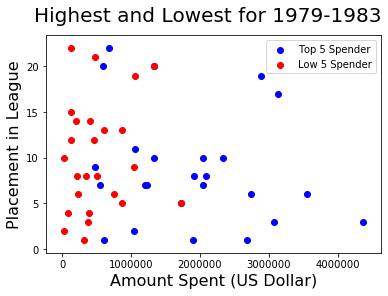

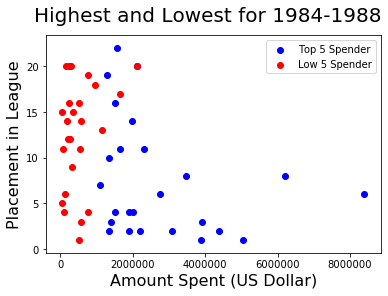

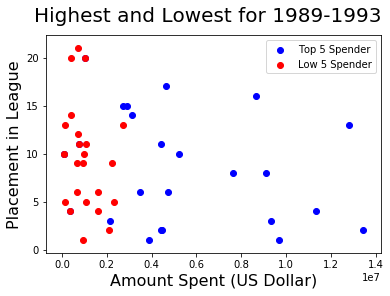

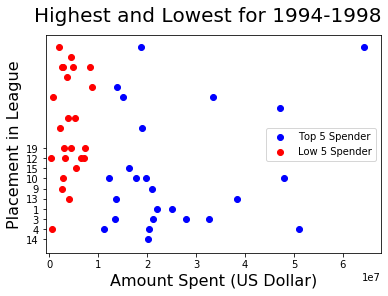

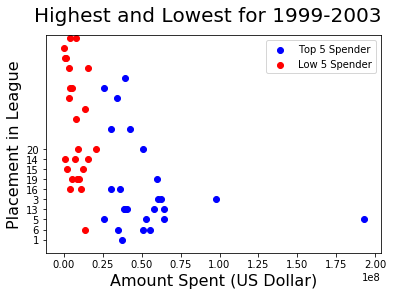

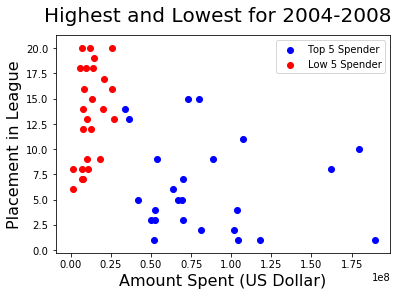

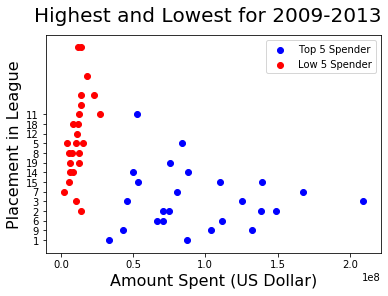

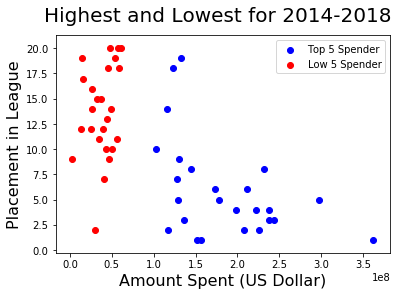

In [160]:
from matplotlib import pyplot as plt

### Part 3: Analyzing Data

def actualVal(string):
    
    if (string == "0" or string == "-"):
        return 0
    else:
        
        string = string[1:]
        
        if string[len(string) - 1] == "k":
            return float(string[: len(string) - 1]) * 1000
            
        elif string[len(string) - 1] == "m":
            return float(string[: len(string) - 1]) * 1000000
        
        return 0

    
def minFive(year):
    year['spent'] = 0
    
    for i, j in year.iterrows(): 
        year.at[i,'spent'] = actualVal(year.loc[i,'Expenditure'])
    
    year = year[year.spent != 0]
    
    year = year.sort_values(by=['spent'])
    
    return year.head(5)
        
    
def maxFive(year):
    year['spent'] = 0
    
    for i, j in year.iterrows(): 
        year.at[i,'spent'] = actualVal(year.loc[i,'Expenditure'])
    
    year = year[year.spent != 0]
    
    year = year.sort_values(by=['spent'])
    
    return year.tail(5)

    

df4 = pd.DataFrame(df3)

startYear = 1979

for i in range (0, 8):
    currentYear = startYear + (5 * i)
    
    for j in range(0, 5):
        current = df4[df4['Season'] == currentYear + j]
        
        topFive = maxFive(current)
        lowFive = minFive(current)
        
        plt.scatter(topFive['spent'], topFive['Pos'], c='blue')
        plt.scatter(lowFive['spent'], lowFive['Pos'], c='red')
        
    plt.suptitle('Highest and Lowest for ' + str(currentYear) + '-' + str(currentYear + 4) , fontsize=20)
    plt.xlabel('Amount Spent (US Dollar)', fontsize=16)
    plt.ylabel('Placement in League', fontsize=16)
    plt.gca().legend(('Top 5 Spender','Low 5 Spender'))
    plt.show()    
    

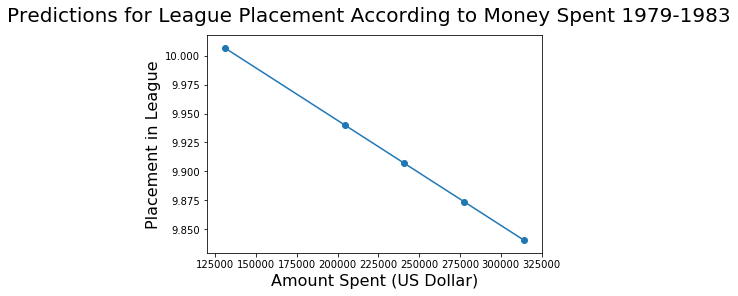

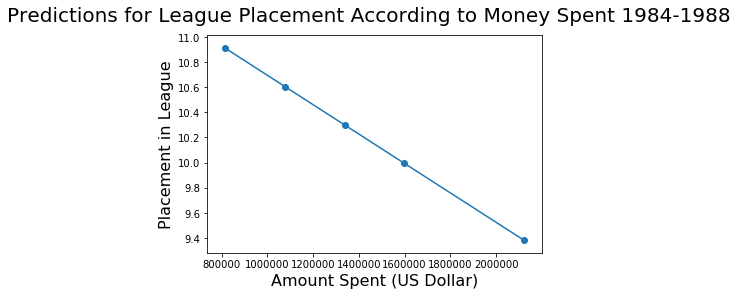

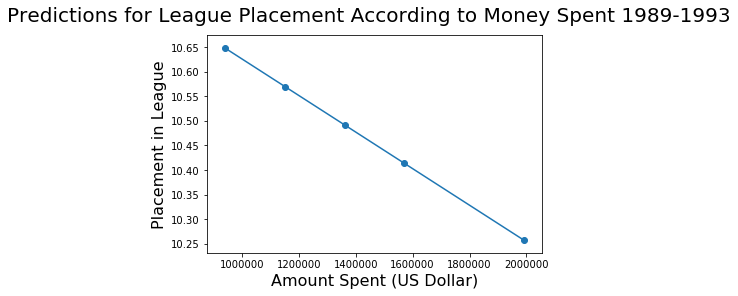

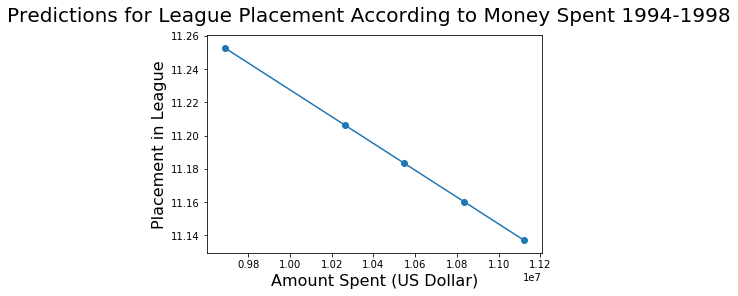

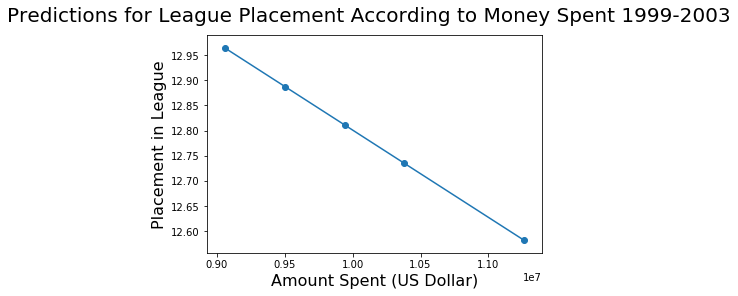

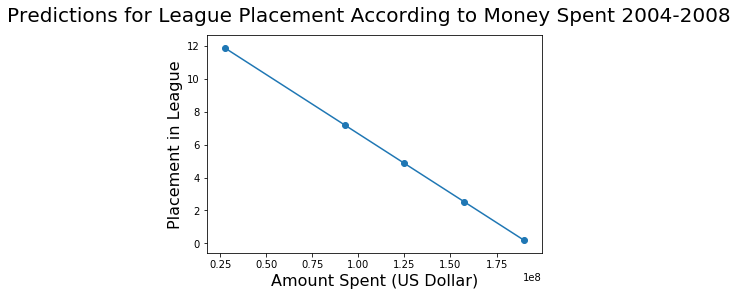

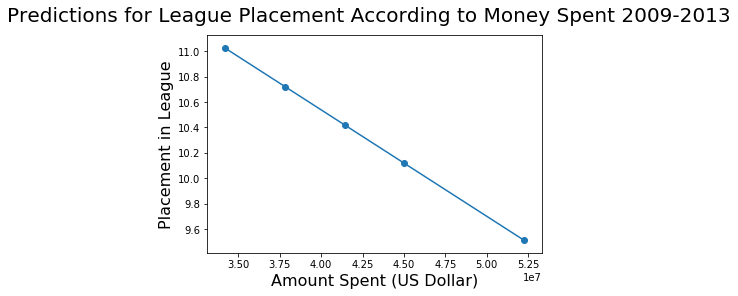

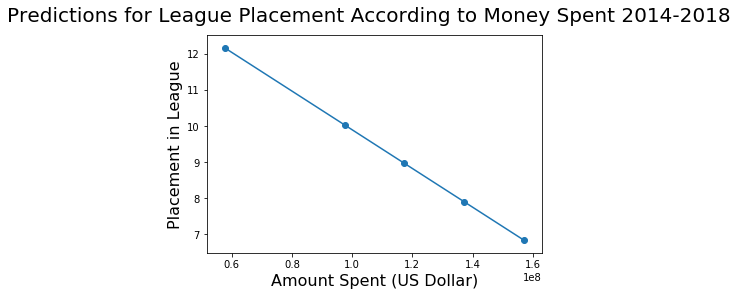

In [201]:
from sklearn import datasets, linear_model, model_selection

# Part 4: Further analyzing the data

# Copying the DataFrame so as to not damage the original data
df5 = pd.DataFrame(df4)

# Convertin the Expenditure column into integers (they are formatted as a string of ${some number}m/k)
df5['spent'] = 0
    
for i, j in df5.iterrows(): 
    df5.at[i,'spent'] = actualVal(df5.loc[i,'Expenditure'])
    
df5 = df5[df5.spent != 0]

# Setting the start year
startYear = 1979

# For the predictions, we will keep the same groupings of every 5 years in the range

# Lumping the years into 8 different categories
for i in range (0, 8):
    
    # Shifting years by 5
    currentYear = startYear + (5 * i)
    
    # Here, we grab the 5 years
    fiveYearPeriod = df5[(df5['Season'] >= currentYear) & (df5['Season'] < (currentYear + 5))]
    
    # Here, we grab the amount spend and positions in the table
    x1 = fiveYearPeriod['spent']
    y1 = fiveYearPeriod['Pos']
    
    x1 = x1.values.reshape(-1, 1)
    y1 = y1.values.reshape(-1, 1)

    # Training our model
    X_train, X_test, y_train, y_test = model_selection.train_test_split(x1, y1, test_size=0.3)
    regression = linear_model.LinearRegression().fit(X_train, y_train)
    
    # Here, we are making test values by taking the min and max spent values, 
    fiveYearPeriod.sort_values(by=['spent'])
    maxVal = fiveYearPeriod.tail(1)["spent"].values
    minVal = fiveYearPeriod.head(1)["spent"].values
    difference = maxVal - minVal
    
    divisor = 5
    interval = difference / divisor
    
    testValues = []
    testValues.append(minVal)
    
    for j in range(1, divisor - 1):
        testValues.append(minVal + (j * interval))
        
    testValues.append(maxVal)
    
    # Making the actual predictions
    prediction = regression.predict(testValues)
    
    # Plotting the predictions
    plt.plot(testValues, prediction)
    plt.scatter(testValues, prediction)
    plt.suptitle('Predictions for League Placement According to Money Spent ' + str(currentYear) + '-' + str(currentYear + 4) , fontsize=20)
    plt.xlabel('Amount Spent (US Dollar)', fontsize=16)
    plt.ylabel('Placement in League', fontsize=16)
    plt.show()
